# Loan analysis pt. 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("loan_data.csv")

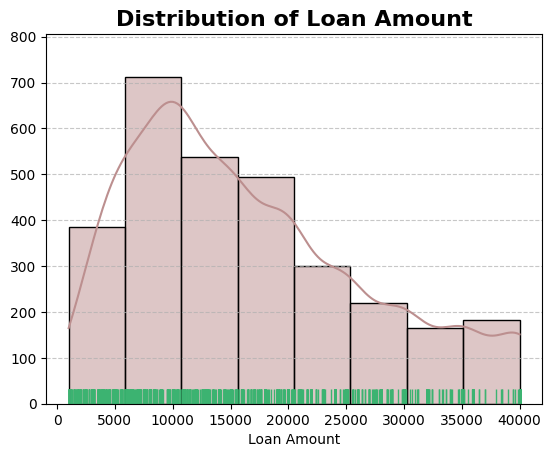

In [13]:
sns.histplot(df, x="loan_amount", color="RosyBrown", binwidth=5000, kde=True) #aggregated
sns.rugplot(df, x="loan_amount", color="MediumSeaGreen", height=0.04)
plt.title("Distribution of Loan Amount", fontsize=16, fontweight="bold")
plt.xlabel("Loan Amount")
plt.ylabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

/tmp/ipykernel_8197/3985342962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="grade", y="loan_amount", palette="RdYlGn_r")


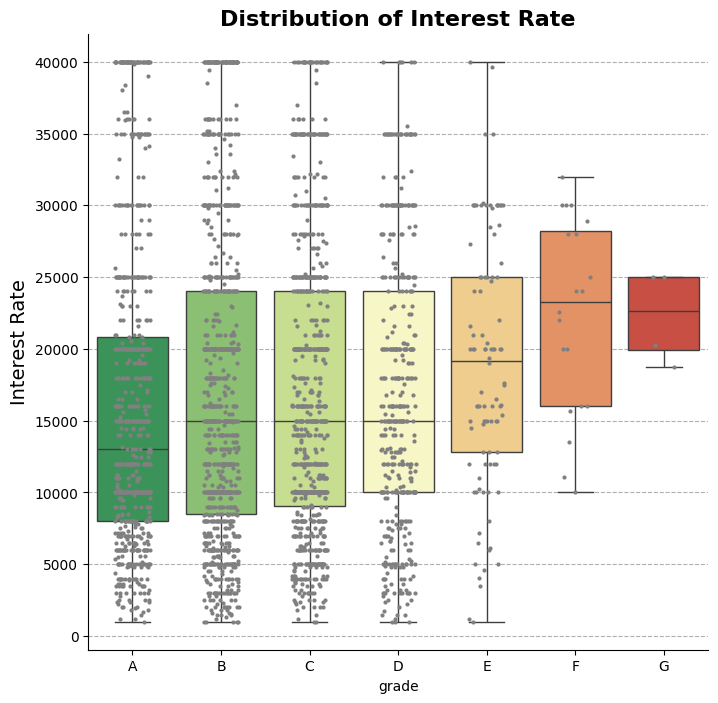

In [26]:
plt.figure(figsize=(8, 8)) # in inches, default 6.4x4.8
sns.boxplot(df, x="grade", y="loan_amount", palette="RdYlGn_r")
sns.stripplot(df, x="grade", y="loan_amount", color="gray", jitter=0.2, size=3)
plt.title("Distribution of Interest Rate", fontsize=16, fontweight="bold")
plt.ylabel("Interest Rate", fontsize=14)
sns.despine()
plt.grid(axis="y", linestyle="--")
plt.show()

In [27]:
# plot multiple distributions - loan amounts for Grade A and D loans
as_only = df[ df["grade"] == "A"]
ds_only = df[ df["grade"] == "D"]

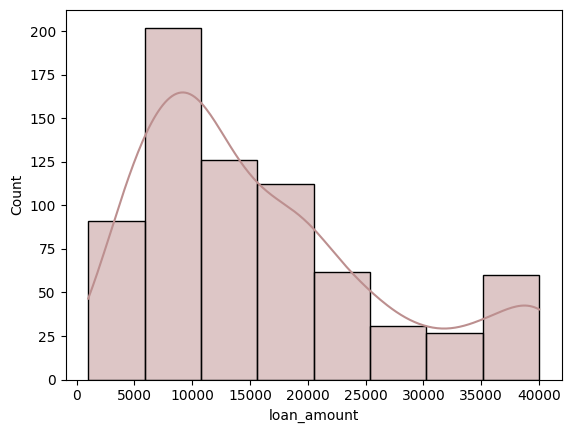

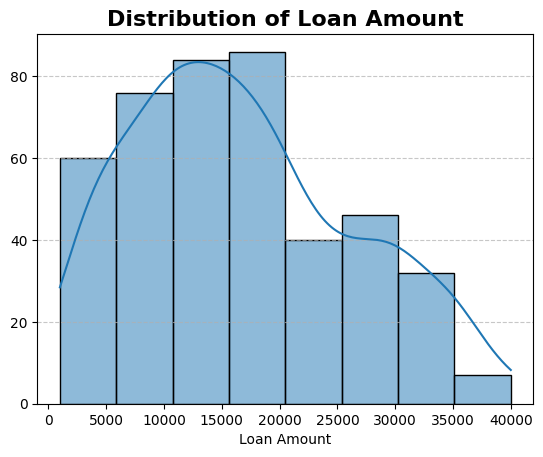

In [29]:
sns.histplot(as_only, x="loan_amount", color="RosyBrown", binwidth=5000, kde=True)
plt.show()
sns.histplot(ds_only, x="loan_amount", binwidth=5000, kde=True)
plt.title("Distribution of Loan Amount", fontsize=16, fontweight="bold")
plt.xlabel("Loan Amount")
plt.ylabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [31]:
# open credit lines feature
df["open_credit_lines"].value_counts().sort_index()

open_credit_lines
1       2
2      28
3      71
4      99
5     172
6     193
7     241
8     239
9     258
10    207
11    225
12    189
13    198
14    144
15    124
16    103
17     82
18     71
19     57
20     44
21     44
22     38
23     39
24     20
25     17
26     18
27     18
28     13
29     11
30     10
31      3
32      3
33      1
34      1
35      5
36      4
37      2
38      3
41      1
46      1
51      1
Name: count, dtype: int64

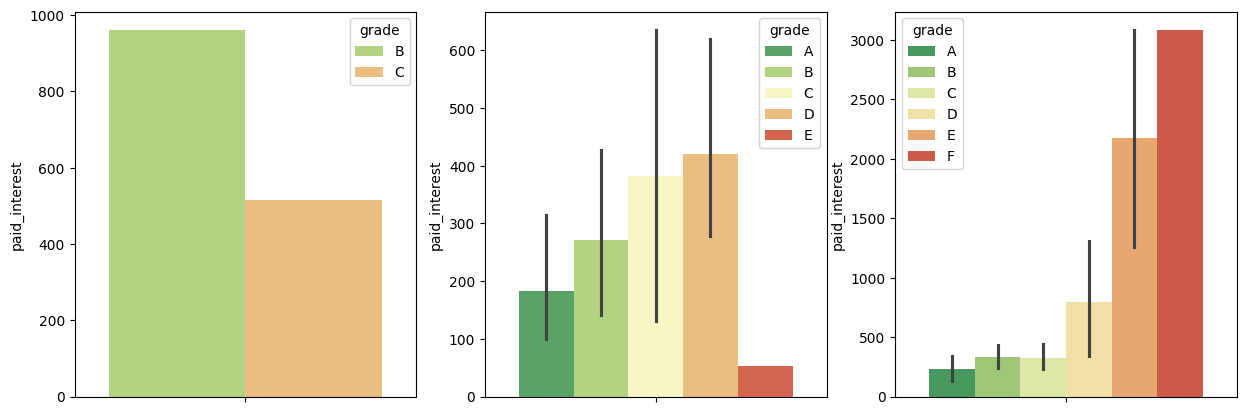

In [35]:
# plot distribution of interest paid, segmented by grade - individual charts
plt.figure(figsize=(15, 5)) # 3 plots: 5x5 for one plot

# one row with three plots
plt.subplot(1, 3, 1) # rows, cols, active plot
filtered_df = df[ df["open_credit_lines"] == 1]
sns.barplot(filtered_df, hue="grade", y="paid_interest", palette="RdYlGn_r")

plt.subplot(1, 3, 2) # rows, cols, active plot
filtered_df = df[ df["open_credit_lines"] == 2]
sns.barplot(filtered_df, hue="grade", y="paid_interest", palette="RdYlGn_r")

plt.subplot(1, 3, 3) # rows, cols, active plot
filtered_df = df[ df["open_credit_lines"] == 3]
sns.barplot(filtered_df, hue="grade", y="paid_interest", palette="RdYlGn_r")

plt.savefig("credit-lines-lots.png")

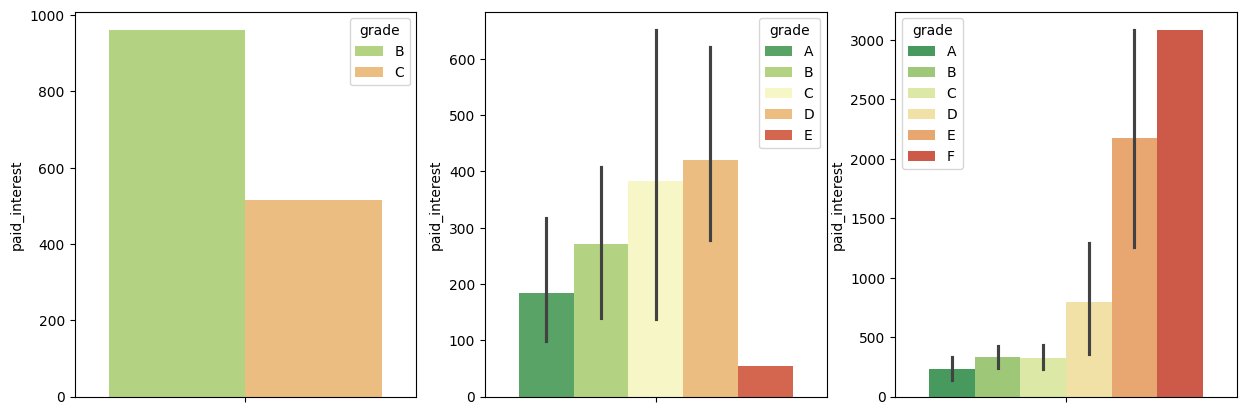

In [36]:
plt.figure(figsize=(15,5))

# loop through numbers 1, 2, and 3
for i in range(1,4): # i = 1, 2, 3
    plt.subplot(1, 3, i) # select appropriate subplot
    filtered_df = df[ df["open_credit_lines"] == i] # filter for rows with i lines of credit
    sns.barplot(filtered_df, hue="grade", y="paid_interest", palette="RdYlGn_r") # plot

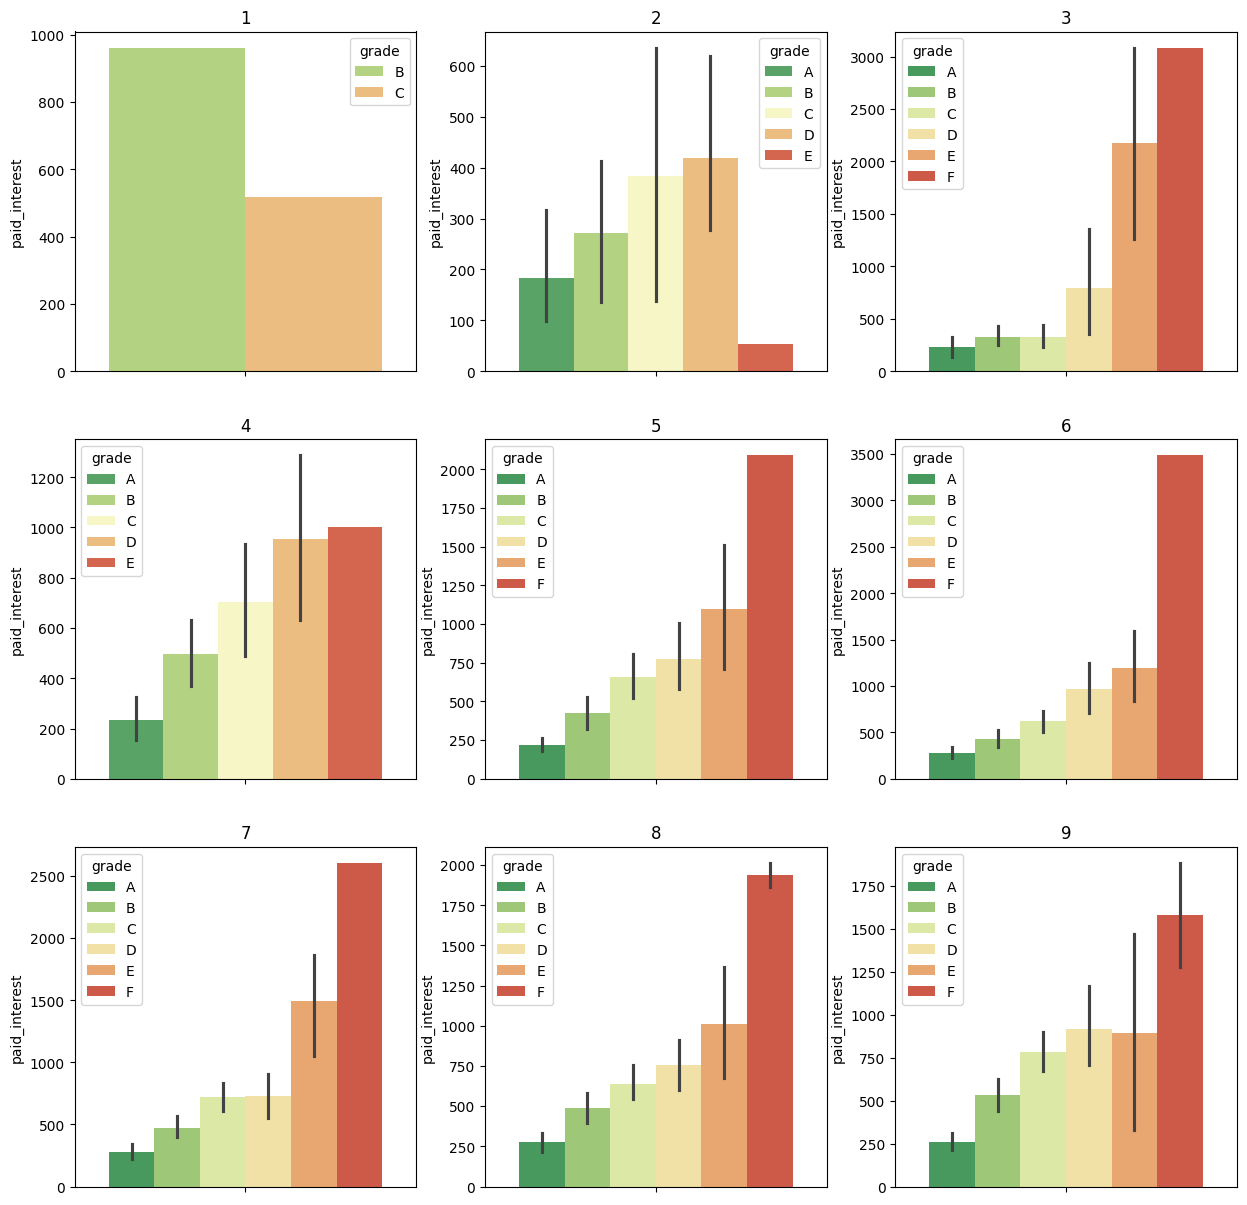

In [39]:
# graph for credit lines 1-9
plt.figure(figsize=(15,15))

# loop through numbers 1, 2, and 3
for i in range(1,10): # i = 1, 2, 3
    plt.subplot(3, 3, i) # select appropriate subplot
    filtered_df = df[ df["open_credit_lines"] == i] # filter for rows with i lines of credit
    sns.barplot(filtered_df, hue="grade", y="paid_interest", palette="RdYlGn_r") # plot
    plt.title(i)

plt.savefig("9graphs.png")

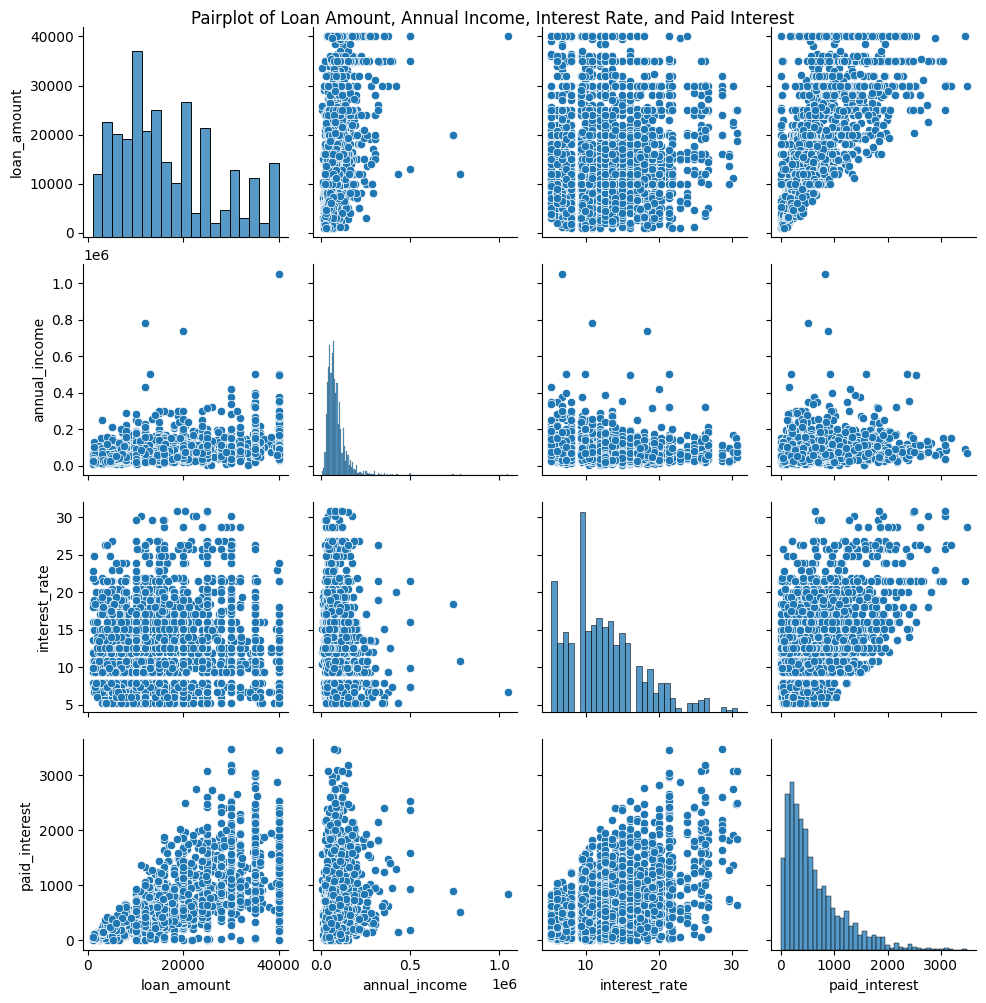

In [49]:
filtered_df = df[['loan_amount', 'annual_income', 'interest_rate', 'paid_interest']]
sns.pairplot(filtered_df)
plt.suptitle("Pairplot of Loan Amount, Annual Income, Interest Rate, and Paid Interest", y=1)
plt.savefig("pairplot.png")